#### This file executes 2 queries, just to check if Data Warehouse is implemented correctly or not.

In [10]:
import configparser
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [43]:
config = configparser.ConfigParser()
config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

In [19]:
#Count Number entries in artists table
query='select COUNT(*) AS total FROM artists'
cur.execute(query)
results = cur.fetchone()
for row in results:
    print(row)

10025


In [20]:
#Check the names of the artists
query='select name FROM artists LIMIT 20'
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

('Temprees',)
('Better Than Ezra',)
('Jacob Miller',)
('Opeth',)
('Gustavo A. Santaolalla',)
('Katie Melua',)
('FRANK T',)
('Marion Meadows',)
('Jason Mraz',)
('Ben Folds',)
('Carolina Liar',)
('Molotov',)
('Chick Corea',)
('White Belt Yellow Tag',)
('Calexico',)
('Time Again',)
('Morgan Heritage',)
('C-Murder/Goodie Mobb',)
('Lifelover',)
('The Budos Band',)


In [44]:
query='select year, duration FROM songs WHERE year<>0 ORDER BY year LIMIT 100'
cur.execute(query)
df=pd.DataFrame(cur.fetchall(), columns=["year","duration"])
df.head()

,year,duration
0,1927,185.41669
1,1944,142.05342
2,1952,133.40689
3,1954,308.87138
4,1954,270.91546


(1, 10)

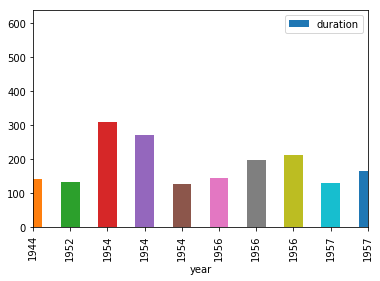

In [49]:
df.plot(x='year', y='duration', kind='bar')
plt.xlim((1,10))

In [50]:
conn.close()